<h1> <u> <center> The Sparks Foundation </center> </u> </h1>
<h2> <u> <center> Graduate Rotational Internship Program </center> </u> </h2>

## Task 2: To Explore Supervised Machine Learning (Linear Regression)

<p>In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.</p>

### Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score, confusion_matrix

### Importing the data.

In [2]:
data = pd.read_csv('file.txt')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Shape of the data.

In [3]:
data.shape

(25, 2)

### Hence, our data has 25 rows and 2 columns.

In [4]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Checking for any null values, if any, in the data.

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Hence, the data doesn't have any missing values.

### Descriptive statistics of the data.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Some interpretation:
- There are total 25 rows and 2 columns.
- The mean time for `Hours` is 5 and mean score for `Scores` is 51.48.
- The standard deviation is less for both `Hours` and `Scores` i.e. the data has less variation.
- 3rd quartile `Q3` is more closer to maximum values.
- `Q3` and maximum values are closer and hence there are no outliers.

### Plotting a simple scatterplot to find any relationship between `Hours` and `Scores`.

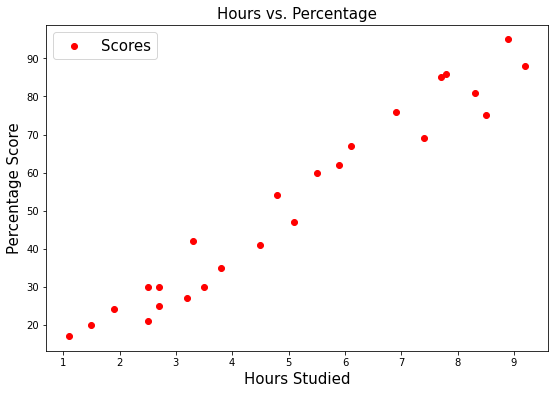

In [7]:
plt.figure(figsize = (9, 6))
plt.scatter(x = 'Hours', y = 'Scores', data = data, color = 'r') ; 
plt.title('Hours vs. Percentage', fontsize = 15)  
plt.xlabel('Hours Studied', fontsize = 15)  
plt.ylabel('Percentage Score', fontsize = 15)  
plt.legend(fontsize = 15);

#### From the scatterplot above, we can see that there is a positive linear relationship between the number of hours studied and percentage of score.

### Preparing and splitting the data.

In [8]:
X = data['Hours'].values.reshape(-1, 1)
y = data['Scores'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [10]:
print('The shape of X_train:', X_train.shape)
print('The shape of X_test:', X_test.shape)
print('The shape of y_train:', y_train.shape)
print('The shape of y_test:', y_test.shape)

The shape of X_train: (18, 1)
The shape of X_test: (7, 1)
The shape of y_train: (18,)
The shape of y_test: (7,)


### Training the data.

In [11]:
reg_model = LinearRegression()  
reg_model.fit(X_train, y_train)

LinearRegression()

### Calculating coefficient and intercept.

In [12]:
print('The coefficient of the regression line:', reg_model.coef_)
print('The intercept of the regession line:', reg_model.intercept_)

The coefficient of the regression line: [9.85419749]
The intercept of the regession line: 1.870904215976367


### Making predictions on test data.

In [13]:
y_pred = reg_model.predict(X_test)
print(y_pred)

[28.47723743 39.31685466 34.38975592 60.01066938 16.65220044 74.79196561
 69.86486686]


### Evaluating the model.

In [14]:
print('Score:', reg_model.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 Score:', r2_score(y_test, y_pred))

Score: 0.9403157736545141
Mean Absolute Error: 4.666937869822484
Root Mean Squared Error: 4.999916451372885
r2 Score: 0.9403157736545141


### Comparing actual and predicted values.

In [15]:
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
df

,Actual Values,Predicted Values
0,25,28.477237
1,35,39.316855
2,42,34.389756
3,62,60.010669
4,20,16.652200
5,69,74.791966
6,76,69.864867


### Plotting the best fit regression line.

In [16]:
reg_line = (reg_model.coef_*X) + reg_model.intercept_
reg_line

array([[26.50639793],
       [52.12731139],
       [33.40433617],
       [85.63158284],
       [36.36059541],
       [16.65220044],
       [92.52952108],
       [56.06899038],
       [83.66074334],
       [28.47723743],
       [77.74822485],
       [60.01066938],
       [46.2147929 ],
       [34.38975592],
       [12.71052145],
       [89.57326183],
       [26.50639793],
       [20.59387944],
       [61.98150888],
       [74.79196561],
       [28.47723743],
       [49.17105214],
       [39.31685466],
       [69.86486686],
       [78.7336446 ]])

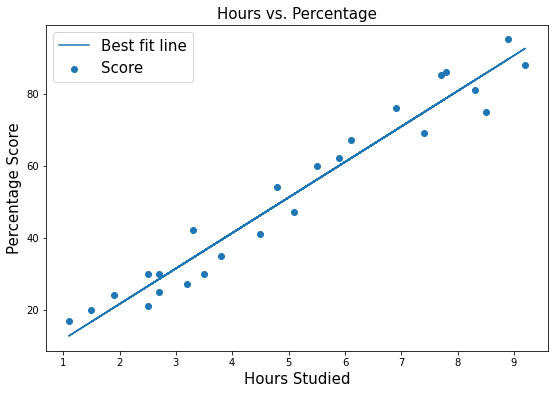

In [17]:
plt.figure(figsize = (9, 6))
plt.scatter(x = X, y = y, label = 'Score')
plt.plot(X, reg_line, label = 'Best fit line')
plt.title('Hours vs. Percentage', fontsize = 15)  
plt.xlabel('Hours Studied', fontsize = 15)  
plt.ylabel('Percentage Score', fontsize = 15)  
plt.legend(fontsize = 15);

### Alternative method of drawing the regression line using `seaborn`.

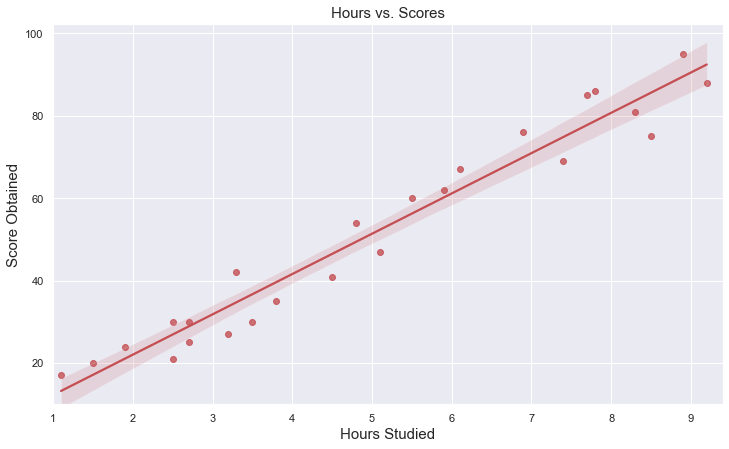

In [18]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 7))
sns.regplot(x = 'Hours', y = 'Scores', data = data, color = 'r')
plt.xlim(left = 1, right = 9.4)
plt.ylim(bottom = 10)
plt.title('Hours vs. Scores', fontsize = 15)
plt.xlabel('Hours Studied', fontsize = 15)  
plt.ylabel('Score Obtained', fontsize = 15);

## What will be predicted score if a student study for 9.25 hrs in a day?

In [19]:
no_of_hours = 9.25

In [20]:
prediction = reg_model.predict([[no_of_hours]])

In [21]:
print('Number of hours:', no_of_hours) 
print('Predicted score:', prediction[0])

Number of hours: 9.25
Predicted score: 93.02223095414197


### Hence, if a student studies for 9.25 hours a day, he will score 93%.